In [22]:
import cv2 ,os
import numpy as np

In [23]:
datapath=r'C:\Users\Eman\Desktop\emotion_detection\CK+48'
data_list=os.listdir(datapath)
img_data=[]

In [24]:
for dataSet in data_list:
    img_list=os.listdir(datapath+'/'+dataSet)
    for img in img_list:
        input_img=cv2.imread(datapath+'/'+dataSet+'/'+img)
        input_img=cv2.resize(input_img,(48,48))
        img_data.append(input_img)


In [25]:
data=np.array(img_data)
data=data.astype('float32')
data=data/255.0
data.shape

(981, 48, 48, 3)

In [26]:
from sklearn.utils import shuffle
from keras .utils import np_utils
from sklearn.model_selection import train_test_split

num_classes=len(data_list)
num_samples=data.shape[0]

labels=np.ones((num_samples,),dtype='int64')
labels[0:135]=0 #anger
labels[135:189]=1 #comtempt
labels[189:366]=2 
labels[366:441]=3
labels[441:648]=4
labels[448:732]=5
labels[731:981]=6
names=data_list
img_label=np_utils.to_categorical(labels,num_classes)

In [27]:
img_label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [28]:
x,y=shuffle(data,img_label,random_state=2)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

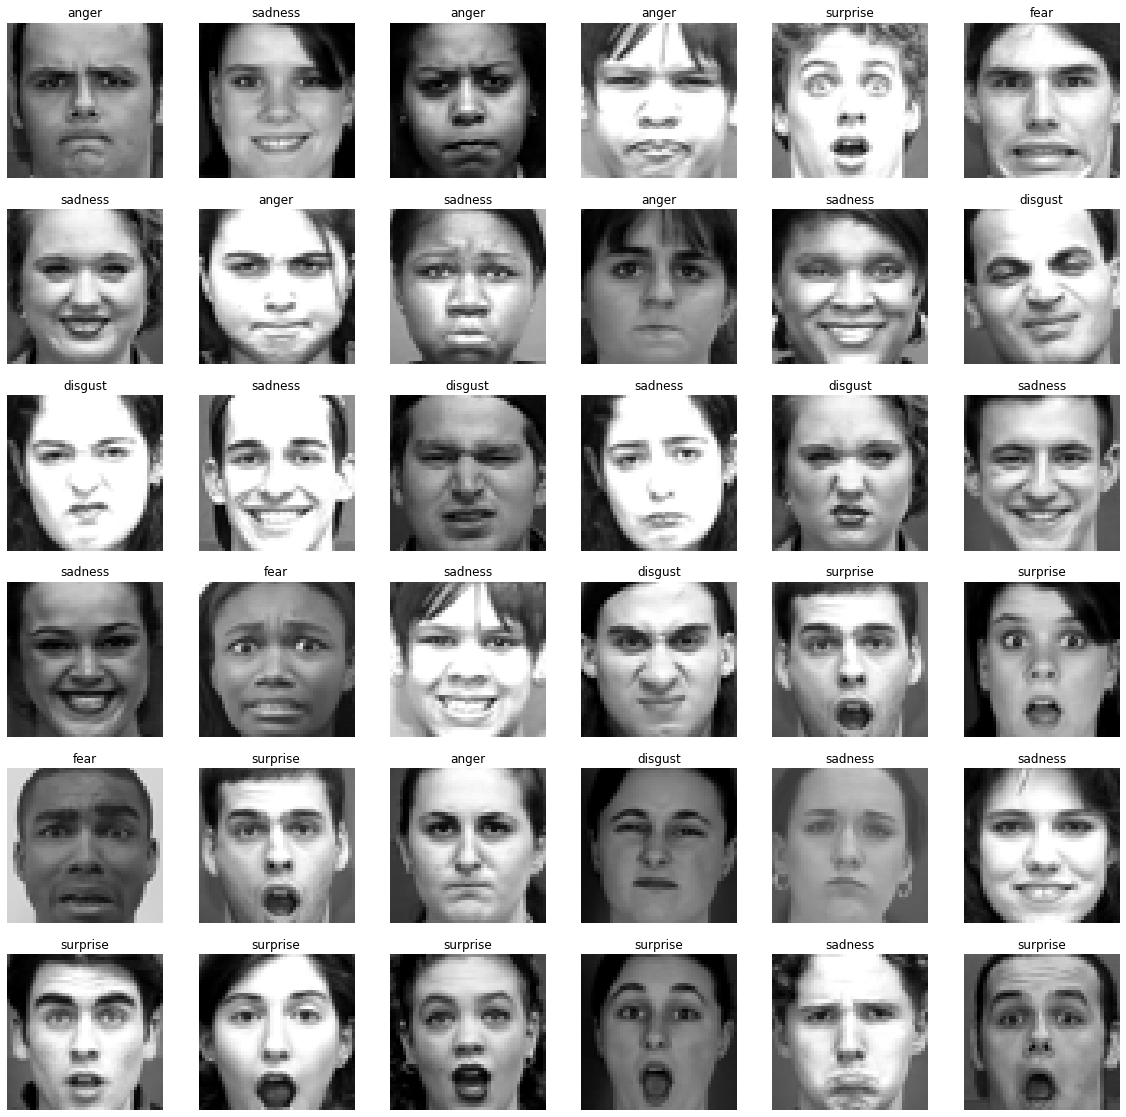

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i,j in enumerate(list(np.random.randint(0,len(x),36))):
                plt.subplot(6,6,i+1)
                plt.imshow(x[j])
                plt.axis('off')
                plt.title(names[list(y[j].astype(int)).index(1)])


In [38]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

def create_model():
    input_shape=(48,48,3)

    model=Sequential()
    model.add(Conv2D(6,(5,5),input_shape=input_shape,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(16,(5,5),input_shape=input_shape,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(224,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7,activation='softmax'))

    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
    return model

In [39]:
model=create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        9280      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model,'my model.jpg',show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [44]:
history=model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
25/25 [==============================] - 1s 29ms/step - loss: 0.0714 - accuracy: 0.9719 - val_loss: 0.1059 - val_accuracy: 0.9695
Epoch 2/25
25/25 [==============================] - 1s 28ms/step - loss: 0.0774 - accuracy: 0.9707 - val_loss: 0.0308 - val_accuracy: 0.9949
Epoch 3/25
25/25 [==============================] - 1s 27ms/step - loss: 0.0537 - accuracy: 0.9898 - val_loss: 0.0256 - val_accuracy: 0.9898
Epoch 4/25
25/25 [==============================] - 1s 27ms/step - loss: 0.0284 - accuracy: 0.9923 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 5/25
25/25 [==============================] - 1s 27ms/step - loss: 0.0584 - accuracy: 0.9783 - val_loss: 0.0301 - val_accuracy: 0.9898
Epoch 6/25
25/25 [==============================] - 1s 30ms/step - loss: 0.0701 - accuracy: 0.9770 - val_loss: 0.0492 - val_accuracy: 0.9848
Epoch 7/25
25/25 [==============================] - 1s 28ms/step - loss: 0.0478 - accuracy: 0.9847 - val_loss: 0.0420 - val_accuracy: 0.9797
Epoch 8/25
25

In [45]:
loss,score=model.evaluate(x_test,y_test,verbose=0)

In [46]:
print(score*100)

99.49238300323486
